# ML Model Trials

## Read Data and Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/erica/Desktop/Y3S2/DSE3101/Local/reslae_price_normalized_for_ML.csv')
#df = pd.read_csv('/Users/erica/Desktop/resale_price_cleaned_final.csv')

# df= df.drop(columns=['flat_model', 'flat_type'])
# df = df.drop(columns = ['building_age_2025', 'total_unemployment_rate'])
# df_orig = pd.read_csv('../data/cleaned/resale_price_cleaned.csv')
# df_orig.dropna(subset = ['resale_price'], inplace = True)
# df['CPI'] = df_orig['CPI (base 2024-12)']
# df = df.drop(columns = ['CPI (base 2024-12)'])
# df['resale_price'] = df_orig['resale_price']
# df["deflated_resale_price"] = df["resale_price"] * (100/ df["CPI"])
# df = df.drop(columns = ['CPI'])
# df = df.drop(columns = ['resale_price'])
# df_normalized_clean = df.copy()
# def normalize(col):
#     return (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else col

# columns_to_normalize = ['inflation_rate (x100)', 'interest_rate', 'fx_rate', 'priv_prop', 'deflated_resale_price', 'resident_unemployment_rate']
# df_normalized_clean[columns_to_normalize] = df[columns_to_normalize].apply(normalize)
# df_normalized_clean
# #df_normalized_clean.to_csv('/Users/erica/Desktop/Y3S2/DSE3101/Local/resale_price_clean_final.csv', index=False)
# df['month'] = pd.to_datetime(df['month'])
# df['year'] = df['month'].dt.year
# df['month_num'] = df['month'].dt.month
# df = df.drop(columns=['month'])
df = df.drop(columns=['flat_model', 'flat_type'])
df = df.drop(columns=['building_age_2025', 'total_unemployment_rate'])
#df_orig = pd.read_csv('../data/cleaned/resale_price_cleaned.csv')
#df_orig.dropna(subset=['resale_price'], inplace=True)

df_normalized_clean = df.copy()

def normalize(col):
    return (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else col

df_normalized_clean['month'] = pd.to_datetime(df_normalized_clean['month'])
df_normalized_clean['year'] = df_normalized_clean['month'].dt.year.astype(float)
df_normalized_clean['month_num'] = df_normalized_clean['month'].dt.month.astype(float)
df_normalized_clean = df_normalized_clean.drop(columns=['month'])
df_normalized_clean = df_normalized_clean.drop(columns = ['CPI (base 2024-12)'])


columns_to_normalize = ['inflation_rate (x100)', 'interest_rate', 'fx_rate', 'priv_prop', 'resale_price', 
                        'resident_unemployment_rate', 'month_num', 'year']

df_normalized_clean[columns_to_normalize] = df_normalized_clean[columns_to_normalize].apply(normalize)

## Prepatory

In [30]:
df_normalized_clean.dropna(subset = ['resale_price'], inplace = True)
X = df_normalized_clean.drop(columns=['resale_price'])
y = df_normalized_clean['resale_price']

In [4]:
df_normalized_clean

,town,storey_range,floor_area_sqm,remaining_lease,resale_price,lat,lon,nearest_mrt_distance,nearest_bus_distance,education_score,...,Christianity_Catholic,Christianity_OtherChristians,OtherReligions,Chinese,Malays,Indians,Others,priv_prop,year,month_num
0,BUKIT MERAH,0.2500,0.083408,0.312121,0.131278,0.000000,0.456109,0.159033,0.226134,0.197110,...,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223,0.583962,0.0,0.181818
1,BUKIT MERAH,0.1250,0.083408,0.309346,0.131197,0.000000,0.456109,0.159033,0.226134,0.197110,...,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223,0.615417,0.0,0.363636
2,BUKIT MERAH,0.0625,0.083408,0.312121,0.127206,0.002888,0.454289,0.170487,0.124639,0.214251,...,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223,0.583962,0.0,0.181818
3,BUKIT MERAH,0.1875,0.116175,0.299116,0.171393,0.002888,0.454289,0.170487,0.124639,0.214251,...,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223,0.592284,0.0,1.000000
4,BUKIT MERAH,0.1250,0.101281,0.310733,0.190853,0.005513,0.415298,0.035276,0.242965,0.144639,...,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223,0.583962,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196981,SEMBAWANG,0.0625,0.235329,0.663256,0.263095,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.054746,0.094928,0.002661,0.739422,0.142192,0.089282,0.029136,0.353128,1.0,0.272727
196982,SEMBAWANG,0.1250,0.235329,0.658921,0.277557,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.054746,0.094928,0.002661,0.739422,0.142192,0.089282,0.029136,0.686015,1.0,0.545455
196983,SEMBAWANG,0.2500,0.178731,0.657534,0.240401,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.054746,0.094928,0.002661,0.739422,0.142192,0.089282,0.029136,0.686015,1.0,0.636364
196984,SEMBAWANG,0.2500,0.238308,0.654586,0.329079,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.054746,0.094928,0.002661,0.739422,0.142192,0.089282,0.029136,0.519712,1.0,0.818182


In [5]:
df_normalized_clean.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'remaining_lease',
       'resale_price', 'lat', 'lon', 'nearest_mrt_distance',
       'nearest_bus_distance', 'education_score', 'shopping_score',
       'food_score', 'recreation_score', 'healthcare_score',
       'inflation_rate (x100)', 'resident_unemployment_rate', 'interest_rate',
       'fx_rate', 'avg_household_income', 'NoReligion', 'Buddhism', 'Taoism1',
       'Islam', 'Hinduism', 'Sikhism', 'Christianity_Catholic',
       'Christianity_OtherChristians', 'OtherReligions', 'Chinese', 'Malays',
       'Indians', 'Others', 'priv_prop', 'year', 'month_num'],
      dtype='object')

In [ ]:
df_normalized_clean.to_csv('/Users/erica/Desktop/Y3S2/DSE3101/Local/resale_price_clean_final.csv', index=False)

In [31]:
categorical_features = ['town']
numerical_features = [
    'storey_range', 'floor_area_sqm', 'remaining_lease',
    'lat', 'lon', 'nearest_mrt_distance', 'nearest_bus_distance',
    'education_score', 'shopping_score', 'food_score', 'recreation_score',
    'healthcare_score', 'inflation_rate (x100)',
    'resident_unemployment_rate',
    'interest_rate', 'fx_rate', 'avg_household_income', 'priv_prop'
]
numerical_features.extend(['year', 'month_num'])
#categorical_features.extend(['flat_model', 'flat_type'])

In [32]:
demographic_features = [
    'NoReligion', 'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
    'Christianity_Catholic', 'Christianity_OtherChristians', 'OtherReligions',
    'Chinese', 'Malays', 'Indians', 'Others'
]
numerical_features.extend(demographic_features)  # Add to numerical pipeline

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regressor

In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'inflation_rate (x100)',
                                                   'resident_unemployment_rate',
                                                   'interest_rate', 'fx_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism',
                                                   'Christianity_Catholic',
                                                   'Christianity_OtherChristians',
                                                   'OtherReligions', 'Chinese', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [11]:
# Save the random forest model
import joblib
joblib.dump(model, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

In [15]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.014768239886838149
Mean Squared Error: 0.0004438361519570945
R² Score: 0.9731489963964131


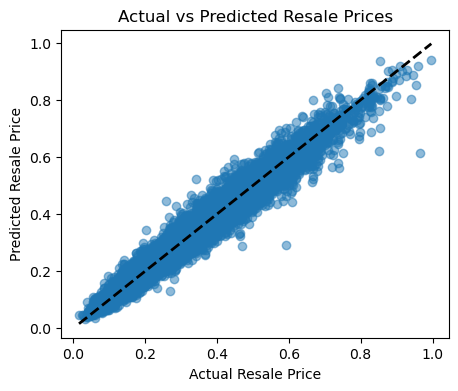

In [166]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## XGBoost

In [35]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Define your pipeline
xg = Pipeline(steps=[
    ('preprocessor', preprocessor),  # optional: OneHotEncoder, StandardScaler, etc.
    ('regressor', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        objective='reg:squarederror'  # important for regression tasks
    ))
])

# Fit the model
xg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'inflation_rate (x100)',
                                                   'resident_unemployment_rate',
                                                   'interest_rate'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [36]:
y_predxg = xg.predict(X_test)

# Evaluation Metrics
maexg = mean_absolute_error(y_test, y_predxg)
msexg = mean_squared_error(y_test, y_predxg)
r2xg = r2_score(y_test, y_predxg)

print(f"Mean Absolute Error: {maexg}")
print(f"Mean Squared Error: {msexg}")
print(f"R² Score: {r2xg}")

Mean Absolute Error: 0.0259419842297738
Mean Squared Error: 0.001307085136440744
R² Score: 0.9209245403872416


## SVM

Mean Absolute Error: 0.0319210664405609
Mean Squared Error: 0.001568455114717185
R² Score: 0.9051122948150319


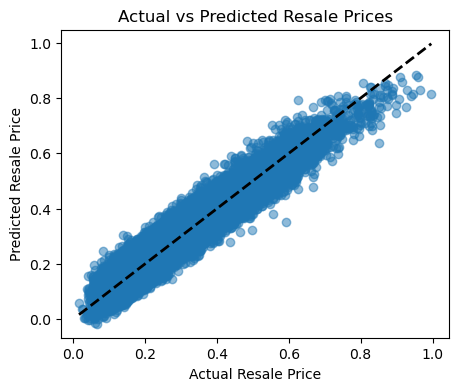

In [67]:
from sklearn import svm
#regr = svm.SVR()
#regr.fit(X_train, y_train)
# Define the preprocessor

# Create a pipeline with the preprocessor and the SVR model
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svm.SVR())
])

# Fit the model
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

# Evaluation Metrics
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Mean Absolute Error: {mae_svm}")
print(f"Mean Squared Error: {mse_svm}")
print(f"R² Score: {r2_svm}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## Decision Tree

Mean Absolute Error: 0.02134708965704325
Mean Squared Error: 0.0009464635294624761
R² Score: 0.9427412671811438


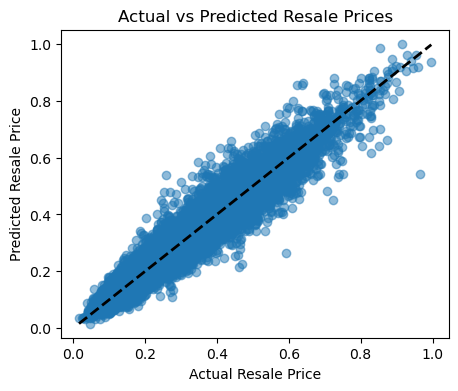

In [68]:
from sklearn import tree

model_dtree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor())
])


model_dtree.fit(X_train, y_train)

y_pred_dtree = model_dtree.predict(X_test)

# Evaluation Metrics
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f"Mean Absolute Error: {mae_dtree}")
print(f"Mean Squared Error: {mse_dtree}")
print(f"R² Score: {r2_dtree}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_dtree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## SGD Regressor

Mean Absolute Error: 0.034293274527056064
Mean Squared Error: 0.0020616204648316655
R² Score: 0.8752769951561429


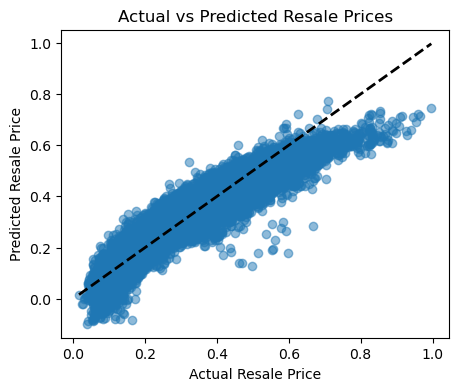

In [69]:
from sklearn.linear_model import SGDRegressor

model_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor())
])


model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

# Evaluation Metrics
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Mean Absolute Error: {mae_sgd}")
print(f"Mean Squared Error: {mse_sgd}")
print(f"R² Score: {r2_sgd}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## PLS Regression

Mean Absolute Error: 0.049084247839524586
Mean Squared Error: 0.004113159749873285
R² Score: 0.7511638770772041


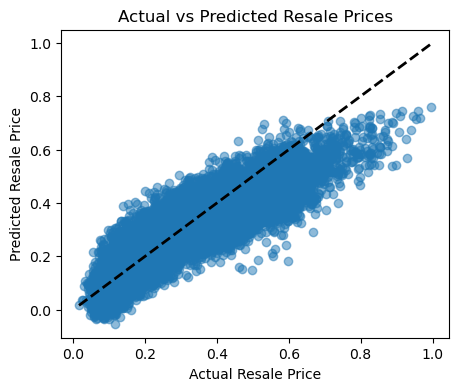

In [70]:
from sklearn.cross_decomposition import PLSRegression


model_PLSR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', PLSRegression(n_components=2))
])


model_PLSR.fit(X_train, y_train)

y_pred_PLSR = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_PLSR = mean_absolute_error(y_test, y_pred_PLSR)
mse_PLSR = mean_squared_error(y_test, y_pred_PLSR)
r2_PLSR = r2_score(y_test, y_pred_PLSR)

print(f"Mean Absolute Error: {mae_PLSR}")
print(f"Mean Squared Error: {mse_PLSR}")
print(f"R² Score: {r2_PLSR}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_PLSR, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## AdaBoost

Mean Absolute Error: 0.06485896915183102
Mean Squared Error: 0.005700826014223773
R² Score: 0.6551139442418784


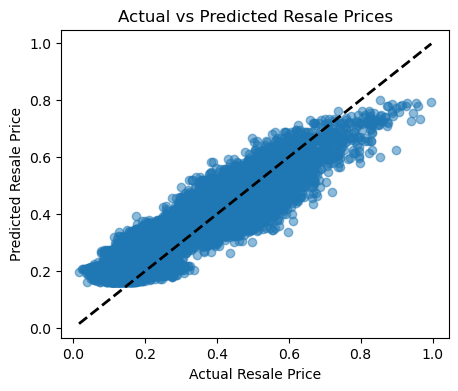

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

model_adb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=0, n_estimators=100))
])


model_adb.fit(X_train, y_train)

y_pred_adb = model_adb.predict(X_test)

# Evaluation Metrics
mae_adb = mean_absolute_error(y_test, y_pred_adb)
mse_adb = mean_squared_error(y_test, y_pred_adb)
r2_adb = r2_score(y_test, y_pred_adb)

print(f"Mean Absolute Error: {mae_adb}")
print(f"Mean Squared Error: {mse_adb}")
print(f"R² Score: {r2_adb}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_adb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()


## Bagging Boost

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
model_bb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(estimator=SVR(),n_estimators=10, random_state=0))
])

model_bb.fit(X_train, y_train)


Mean Absolute Error: 0.043710401205857854
Mean Squared Error: 0.003254910271208883
R² Score: 0.8030858751901975


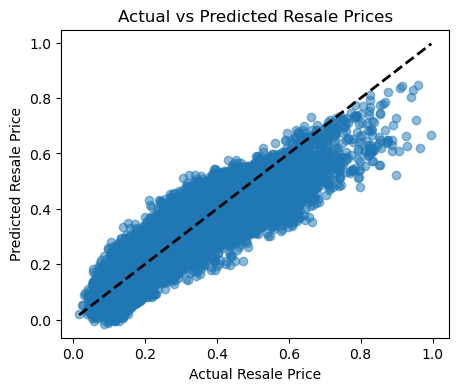

In [ ]:
y_pred_bb = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_bb = mean_absolute_error(y_test, y_pred_bb)
mse_bb = mean_squared_error(y_test, y_pred_bb)
r2_bb = r2_score(y_test, y_pred_bb)

print(f"Mean Absolute Error: {mae_bb}")
print(f"Mean Squared Error: {mse_bb}")
print(f"R² Score: {r2_bb}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_bb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()


## CatBoost

In [41]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

# Build the pipeline
cat = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your ColumnTransformer with OneHotEncoder
    ('regressor', CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE',
        verbose=100,
        random_state=42
    ))
])

# Fit the model
cat.fit(X_train, y_train)

# Predict
y_pred_cat = cat.predict(X_test)



0:	learn: 0.1200990	total: 62.4ms	remaining: 31.1s
100:	learn: 0.0311993	total: 550ms	remaining: 2.17s
200:	learn: 0.0265599	total: 1.05s	remaining: 1.56s
300:	learn: 0.0242665	total: 1.53s	remaining: 1.01s
400:	learn: 0.0229200	total: 1.99s	remaining: 492ms
499:	learn: 0.0220414	total: 2.45s	remaining: 0us


In [42]:
# Evaluation Metrics
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

In [43]:
print(f"Mean Absolute Error: {mae_cat}")
print(f"Mean Squared Error: {mse_cat}")
print(f"R² Score: {r2_cat}")

Mean Absolute Error: 0.01633492331464348
Mean Squared Error: 0.0005044926436421274
R² Score: 0.969479426737353


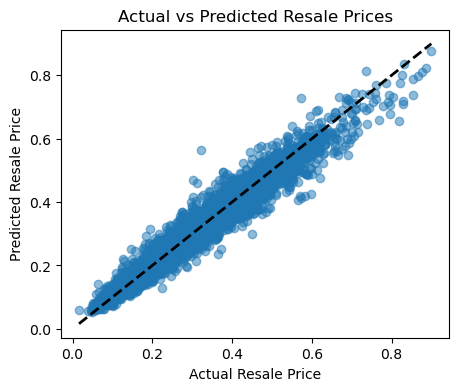

In [29]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_cat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()


## Test for Multicollinearity

In [ ]:
X_train

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,lat,lon,nearest_mrt_distance,nearest_bus_distance,...,Christianity_Catholic,Christianity_OtherChristians,OtherReligions,Chinese,Malays,Indians,Others,priv_prop,year,month_num
94207,BUKIT BATOK,0.333333,0.1250,0.107239,Model A,0.927692,0.456307,0.176736,0.394811,0.246491,...,0.058381,0.127367,0.002730,0.739422,0.142192,0.089282,0.029136,29889.0,2024,9
144327,SENGKANG,0.666667,0.1250,0.235329,Improved,0.657534,0.648222,0.678302,0.141621,0.178991,...,0.068559,0.098341,0.002184,0.739422,0.142192,0.089282,0.029136,34341.0,2023,9
193000,WOODLANDS,0.666667,0.3125,0.241287,Improved,0.882955,0.948571,0.389980,0.222824,0.235243,...,0.045909,0.069320,0.002847,0.739422,0.142192,0.089282,0.029136,25052.0,2023,6
187753,WOODLANDS,0.333333,0.1875,0.107239,New Generation,0.200971,0.916623,0.287211,0.284800,0.129219,...,0.045909,0.069320,0.002847,0.739422,0.142192,0.089282,0.029136,27531.0,2024,12
179259,WOODLANDS,0.666667,0.1250,0.277033,Improved,0.596844,0.868386,0.352170,0.171935,0.287447,...,0.045909,0.069320,0.002847,0.739422,0.142192,0.089282,0.029136,34341.0,2023,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,BUKIT PANJANG,0.500000,0.1875,0.157879,Simplified,0.479799,0.563287,0.288578,0.038311,0.398369,...,0.058920,0.105860,0.002015,0.739422,0.142192,0.089282,0.029136,25105.0,2018,8
103694,TAMPINES,0.333333,0.1250,0.110217,Model A,0.952315,0.500775,0.833377,0.408645,0.101881,...,0.059890,0.109163,0.002150,0.739422,0.142192,0.089282,0.029136,27531.0,2024,11
131932,CHOA CHU KANG,0.500000,0.1250,0.217456,Model A,0.432114,0.600403,0.205302,0.088329,0.361387,...,0.051255,0.089835,0.001906,0.739422,0.142192,0.089282,0.029136,34341.0,2023,7
146867,PUNGGOL,0.500000,0.1875,0.181710,Model A,0.861280,0.658011,0.756303,0.045486,0.576223,...,0.067264,0.109799,0.002630,0.739422,0.142192,0.089282,0.029136,34341.0,2023,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196986 entries, 0 to 196985
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   town                          196986 non-null  object 
 1   storey_range                  196986 non-null  float64
 2   floor_area_sqm                196986 non-null  float64
 3   remaining_lease               196986 non-null  float64
 4   resale_price                  196986 non-null  float64
 5   lat                           196986 non-null  float64
 6   lon                           196986 non-null  float64
 7   nearest_mrt_distance          196986 non-null  float64
 8   nearest_bus_distance          196986 non-null  float64
 9   education_score               196986 non-null  float64
 10  shopping_score                196986 non-null  float64
 11  food_score                    196986 non-null  float64
 12  recreation_score              196986 non-nul

In [ ]:
town_columns = [col for col in df_encoded.columns if col.startswith('town')]
df_encoded[town_columns] = df_encoded[town_columns].astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196986 entries, 0 to 196985
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   storey_range                  196986 non-null  float64
 1   floor_area_sqm                196986 non-null  float64
 2   remaining_lease               196986 non-null  float64
 3   resale_price                  196986 non-null  float64
 4   lat                           196986 non-null  float64
 5   lon                           196986 non-null  float64
 6   nearest_mrt_distance          196986 non-null  float64
 7   nearest_bus_distance          196986 non-null  float64
 8   education_score               196986 non-null  float64
 9   shopping_score                196986 non-null  float64
 10  food_score                    196986 non-null  float64
 11  recreation_score              196986 non-null  float64
 12  healthcare_score              196986 non-nul

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df_encoded = pd.get_dummies(df, columns=['town'], drop_first=True)

In [ ]:
X = df_encoded.drop(columns=['resale_price'])
y = df_encoded['resale_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each feature
X_train_vif = X_train.copy()  # Ensure we work with a copy
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

vif_data


,Feature,VIF
0,storey_range,2.852436
1,floor_area_sqm,10.115270
2,remaining_lease,17518.356693
3,lat,303.359816
4,lon,439.641069
...,...,...
56,town_SERANGOON,22.200304
57,town_TAMPINES,117.467340
58,town_TOA PAYOH,12.195202
59,town_WOODLANDS,198.376297
